In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_excel("covid19_zip.xlsx")
df.columns

Index(['zip_code', 'neighborhood_name', 'borough_group', 'covid_case_count',
       'covid_case_rate', 'pop_denominator', 'covid_death_count',
       'covid_death_rate', 'percent_positive', 'total_covid_tests', 'geoid',
       'median_income', 'pop_est', 'log_median_income', 'e_pov_rate',
       'e_unemp_rate', 'e_nohsdp_rate', 'e_age65_rate', 'e_disabl_rate',
       'e_sngpnt_rate', 'e_minrty_rate', 'e_limeng_rate', 'e_munit_rate',
       'e_mobile_rate', 'e_crowd_rate', 'e_noveh_rate', 'e_groupq_rate',
       'copd_rate', 'coronary_heart_disease_rate', 'diabetes_rate',
       'high_blood pressure_rate', 'obesity_rate',
       'chronic_kidney_disease_rate', 'public_assistance_total_rate',
       'total_ed_visits_rate', 'ili_pne_visits_rate',
       'ili_pne_admissions_rate'],
      dtype='object')

In [3]:
df_model = df[['covid_case_rate', 'covid_death_count','percent_positive','covid_death_rate',
               'log_median_income', 'e_disabl_rate','e_sngpnt_rate', 'e_minrty_rate',
               'e_limeng_rate', 'e_munit_rate','e_crowd_rate', 'e_noveh_rate', 
               'e_groupq_rate','copd_rate', 'coronary_heart_disease_rate', 
               'diabetes_rate','high_blood pressure_rate', 'obesity_rate',
               'chronic_kidney_disease_rate', 'ili_pne_admissions_rate' ]]

In [4]:
df_model.info()
df_model.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 0 to 176
Data columns (total 20 columns):
covid_case_rate                177 non-null float64
covid_death_count              177 non-null int64
percent_positive               177 non-null float64
covid_death_rate               177 non-null float64
log_median_income              177 non-null float64
e_disabl_rate                  177 non-null float64
e_sngpnt_rate                  177 non-null float64
e_minrty_rate                  177 non-null float64
e_limeng_rate                  177 non-null float64
e_munit_rate                   177 non-null float64
e_crowd_rate                   177 non-null float64
e_noveh_rate                   177 non-null float64
e_groupq_rate                  177 non-null float64
copd_rate                      177 non-null float64
coronary_heart_disease_rate    177 non-null float64
diabetes_rate                  177 non-null float64
high_blood pressure_rate       177 non-null float64
obesity_rate 

,covid_case_rate,covid_death_count,percent_positive,covid_death_rate,log_median_income,e_disabl_rate,e_sngpnt_rate,e_minrty_rate,e_limeng_rate,e_munit_rate,e_crowd_rate,e_noveh_rate,e_groupq_rate,copd_rate,coronary_heart_disease_rate,diabetes_rate,high_blood pressure_rate,obesity_rate,chronic_kidney_disease_rate,ili_pne_admissions_rate
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,1.770000e+02,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,168.000000
mean,2338.201073,99.175141,19.102655,193.888079,11.099865,43693.908769,13479.127056,273931.367756,42734.381593,1.174527e+05,13694.641901,97409.695596,9973.801865,785.120619,773.822522,1523.201333,4054.534475,3487.964848,433.020249,2017.239421
std,890.505867,79.724582,5.937915,105.136590,0.464267,17437.858420,8453.138254,133899.796788,34451.798603,1.604639e+05,10623.079363,104761.527075,13841.227318,268.280462,274.694832,569.273362,1439.965850,1254.532061,153.325476,972.567574
min,582.200000,0.000000,7.150000,0.000000,9.959348,6160.972785,1533.983907,23491.525424,870.056497,4.949833e+02,1977.401130,8511.029412,0.000000,168.578460,129.675738,259.351477,1193.016792,1400.497973,115.843504,220.588235
25%,1654.400000,38.000000,15.140000,121.560000,10.836281,33732.310953,7610.757925,173388.118473,15491.383711,3.276459e+04,7569.309313,40363.668882,2200.887788,623.939856,634.801229,1183.466859,3298.352484,2649.125093,353.092661,1345.962827
50%,2411.110000,78.000000,20.150000,182.630000,11.104702,42061.981184,10843.658187,266701.624735,33224.940334,8.020389e+04,11480.910803,73698.638884,5781.960619,753.325239,743.746496,1492.593687,3817.134512,3349.508380,417.400347,1959.857002
75%,2962.490000,148.000000,24.080000,242.660000,11.370693,50152.488583,17065.874615,359240.399966,63028.882378,1.384509e+05,17186.210620,118268.105023,12198.408203,913.541383,869.740316,1799.783924,4568.393122,4003.672232,492.307824,2494.017578
max,4489.580000,407.000000,29.010000,660.580000,12.429220,169156.342183,43606.177424,755759.577279,170419.565217,1.427001e+06,112906.208719,950871.862616,131408.230101,2066.574238,2399.252704,3774.965115,12654.648968,8241.769899,1335.970501,6084.264573


In [5]:
df_model.to_csv ("output.txt")

### H1: There is a positive and significant relationship between people living in low-income communities with unfavorable working conditions and the high number of infected COVID-19 Cases.

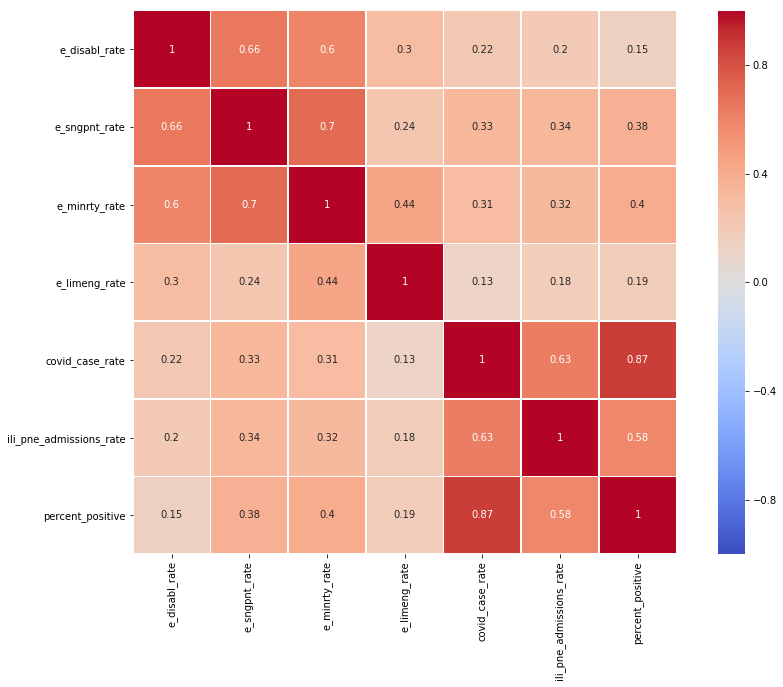

<Figure size 432x288 with 0 Axes>

In [6]:
# Choose relevent columns - Include all columns
df_modelh1_all= df_model[[ 'e_disabl_rate','e_sngpnt_rate', 'e_minrty_rate',
               'e_limeng_rate', 'covid_case_rate', 'ili_pne_admissions_rate','percent_positive']]

plt.figure(figsize=(15,10))
corrMatrix = df_modelh1_all.corr()
sns.heatmap(corrMatrix, annot=True, linewidth = 0.5, cmap='coolwarm',square=True, vmin = -1, vmax = 1)
plt.show()
plt.tight_layout()

In [7]:
# train test split 
from sklearn.model_selection import train_test_split

X = df_modelh1_all.drop(['covid_case_rate', 'ili_pne_admissions_rate','percent_positive'], axis =1)
y = df_modelh1_all.covid_case_rate.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# multiple linear regression 
import statsmodels.api as sm

X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     5.914
Date:                Tue, 28 Jul 2020   Prob (F-statistic):           0.000175
Time:                        16:21:37   Log-Likelihood:                -1441.4
No. Observations:                 177   AIC:                             2893.
Df Residuals:                     172   BIC:                             2909.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1780.0820    180.447      9.865      0.000    1423.907    2136.257
e_disabl_rate    -0.0017      0.005     -0.340      0.734      -0.012       0.008
e_sngpnt_rate     0.0263      0.012      2.235      0.027       0.003       0.050
e_minrty_rate     0.0009      0.001      1.252      0.212      -0.001       0.002
e_limeng_rate     0.0005      0.002      0.257      0.797      -0.004       0.005
==============================================================================
Omnibus:                        0.279   Durbin-Watson:                   0.700
Prob(Omnibus):                  0.870   Jarque-Bera (JB):                0.289
Skew:                           0.093   Prob(JB):                        0.866
Kurtosis:                       2.933   Cond. No.                     8.86e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### H2: There is a positive and significant relationship between people living in low-income communities with underlying health issues and the high number of infected COVID-19 Cases.

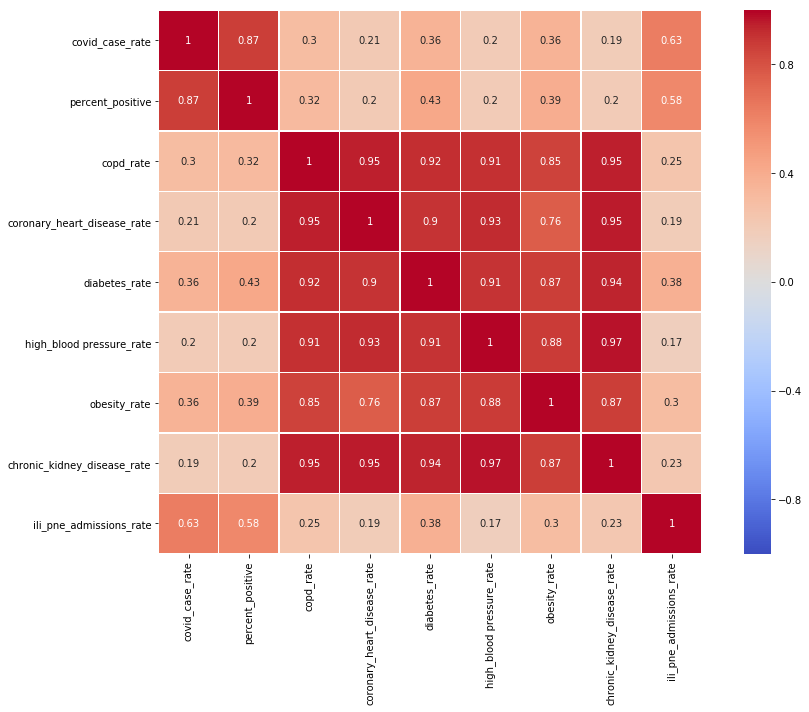

<Figure size 432x288 with 0 Axes>

In [8]:
# Choose relevent columns - Include all columns
df_modelh2_all= df_model[['covid_case_rate', 'percent_positive', 'copd_rate',
       'coronary_heart_disease_rate', 'diabetes_rate',
       'high_blood pressure_rate', 'obesity_rate',
       'chronic_kidney_disease_rate', 'ili_pne_admissions_rate']]

plt.figure(figsize=(15,10))
corrMatrix = df_modelh2_all.corr()
sns.heatmap(corrMatrix, annot=True, linewidth = 0.5, cmap='coolwarm',square=True, vmin = -1, vmax = 1)
plt.show()
plt.tight_layout()

In [9]:
# train test split 
from sklearn.model_selection import train_test_split

X = df_modelh2_all.drop(['covid_case_rate', 'percent_positive','ili_pne_admissions_rate'], axis =1)
y = df_modelh2_all.covid_case_rate.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# multiple linear regression 
import statsmodels.api as sm

X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     23.82
Date:                Tue, 28 Jul 2020   Prob (F-statistic):           2.42e-20
Time:                        16:21:44   Log-Likelihood:                -1398.8
No. Observations:                 177   AIC:                             2812.
Df Residuals:                     170   BIC:                             2834.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                        1477.1241    161.056      9.171      0.000    1159.197    1795.051
copd_rate                       0.5201      0.911      0.571      0.569      -1.279       2.319
coronary_heart_disease_rate     2.9462      1.129      2.608      0.010       0.717       5.176
diabetes_rate                   1.7965      0.291      6.167      0.000       1.221       2.372
high_blood pressure_rate       -0.1206      0.180     -0.670      0.504      -0.476       0.235
obesity_rate                    0.5946      0.145      4.106      0.000       0.309       0.880
chronic_kidney_disease_rate   -14.1993      2.009     -7.069      0.000     -18.164     -10.234
==============================================================================
Omnibus:                       15.573   Durbin-Watson:                   1.179
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.967
Skew:                           0.729   Prob(JB):                     0.000207
Kurtosis:                       3.420   Cond. No.                     1.93e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.93e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### H3: There is a positive and significant relationship between people living in low-income communities with poor living conditions and the infection rate of COVID-19

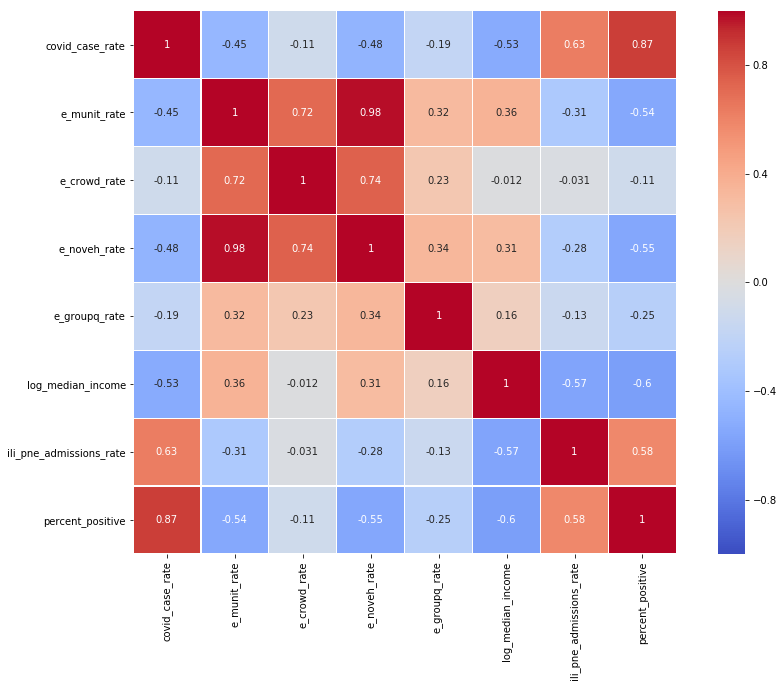

<Figure size 432x288 with 0 Axes>

In [10]:
# Choose relevent columns - Include all columns
df_modelh3_all= df_model[['covid_case_rate', 'e_munit_rate',
       'e_crowd_rate', 'e_noveh_rate', 'e_groupq_rate','log_median_income','ili_pne_admissions_rate','percent_positive']]

plt.figure(figsize=(15,10))
corrMatrix = df_modelh3_all.corr()
sns.heatmap(corrMatrix, annot=True, linewidth = 0.5, cmap='coolwarm',square=True, vmin = -1, vmax = 1)
plt.show()
plt.tight_layout()

In [11]:
# train test split 
from sklearn.model_selection import train_test_split

X = df_modelh3_all.drop(['covid_case_rate','ili_pne_admissions_rate','percent_positive'], axis =1)
y = df_modelh3_all.covid_case_rate.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# multiple linear regression 
import statsmodels.api as sm

X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                     31.62
Date:                Tue, 28 Jul 2020   Prob (F-statistic):           1.01e-22
Time:                        16:21:50   Log-Likelihood:                -1394.9
No. Observations:                 177   AIC:                             2802.
Df Residuals:                     171   BIC:                             2821.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.093e+04   1413.800      7.731      0.000    8139.010    1.37e+04
e_munit_rate          0.0054      0.002      3.499      0.001       0.002       0.009
e_crowd_rate          0.0304      0.007      4.067      0.000       0.016       0.045
e_noveh_rate         -0.0135      0.002     -5.603      0.000      -0.018      -0.009
e_groupq_rate         0.0010      0.004      0.268      0.789      -0.006       0.008
log_median_income  -751.4160    125.984     -5.964      0.000   -1000.101    -502.731
==============================================================================
Omnibus:                        5.573   Durbin-Watson:                   1.090
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                5.706
Skew:                           0.433   Prob(JB):                       0.0577
Kurtosis:                       2.841   Cond. No.                     7.08e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.08e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### H4: There is a positive and significant relationship between the confirmed cases and the death rate of COVID-19

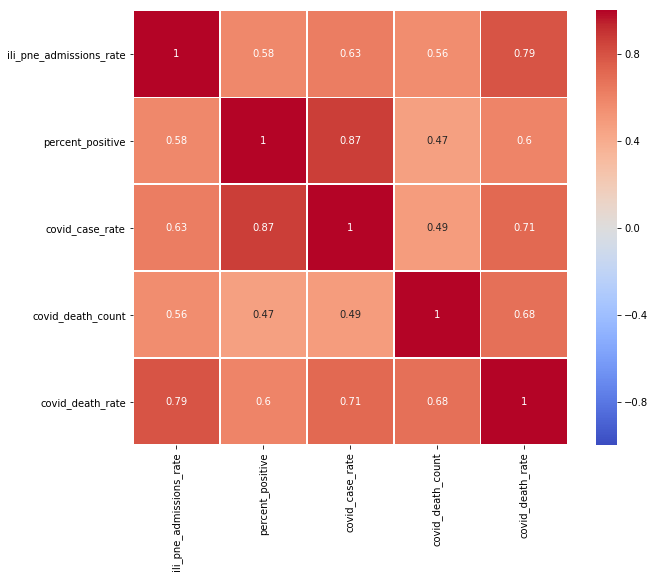

<Figure size 432x288 with 0 Axes>

In [12]:
df_modelh4= df[['ili_pne_admissions_rate','percent_positive', 'covid_case_rate','covid_death_count','covid_death_rate']]

plt.figure(figsize=(10,8))
corrMatrix = df_modelh4.corr()
sns.heatmap(corrMatrix, annot=True, linewidth = 0.5, cmap='coolwarm',square=True, vmin = -1, vmax = 1)
plt.show()
plt.tight_layout()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0.98, 'Correlation between Confirmed and Death Cases per 100,000')

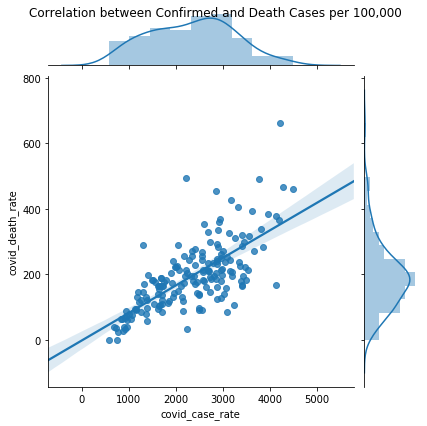

In [16]:
chart = sns.jointplot(x='covid_case_rate', y='covid_death_rate', data=df, kind="reg")
chart.fig.suptitle('Correlation between Confirmed and Death Cases per 100,000') 

Text(0.5, 0.98, 'Correlation between Hospital Admissions for influenza-like and/or pneumonia illnesses and Death Cases per 100,000')

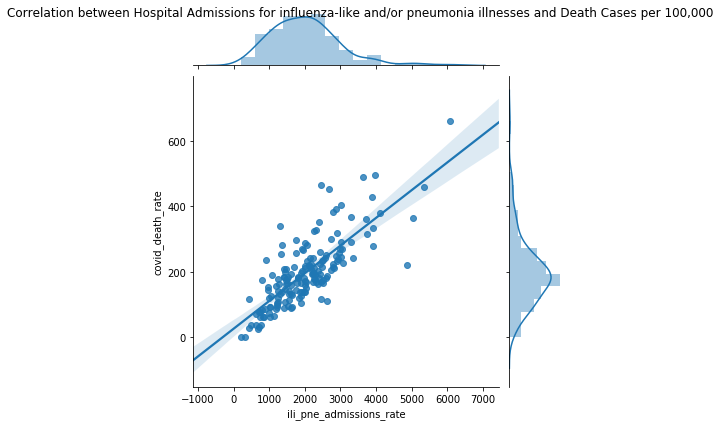

In [17]:
chart = sns.jointplot(x='ili_pne_admissions_rate', y='covid_death_rate', data=df, kind="reg")
chart.fig.suptitle('Correlation between Hospital Admissions for influenza-like and/or pneumonia illnesses and Death Cases per 100,000') 